# Training a neural network on a binary-classification task using Keras

This example trains a neural network on a binary-classification task and is designed to present a typical Keras workflow for training neural networks.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D as plt3d
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense

/home/stefan/py2_virtualenv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Create the dataset

The dataset is drawn from 2D-Gaussian distributions with different means for the signal and background class. See below the plots of the distributions.

In [2]:
num_events = 10000

signal_mean = [1.0, 1.0]
signal_cov = [[1.0, 0.0],
              [0.0, 1.0]]
signal_train = np.random.multivariate_normal(
        signal_mean, signal_cov, num_events)
signal_val = np.random.multivariate_normal(
        signal_mean, signal_cov, num_events)

background_mean = [-1.0, -1.0]
background_cov = [[1.0, 0.0],
                  [0.0, 1.0]]
background_train = np.random.multivariate_normal(
        background_mean, background_cov, num_events)
background_val = np.random.multivariate_normal(
        background_mean, background_cov, num_events)

data_train = np.vstack([signal_train, background_train])
labels_train = np.vstack([np.ones((num_events, 1)), np.zeros((num_events, 1))])

data_val = np.vstack([signal_val, background_val])
labels_val = np.vstack([np.ones((num_events, 1)), np.zeros((num_events, 1))])

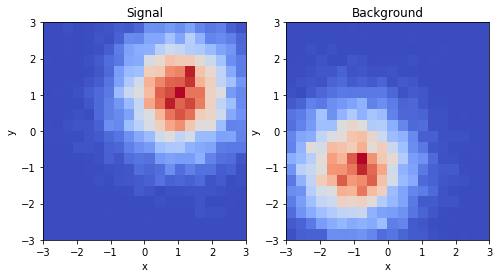

In [3]:
range_ = ((-3, 3), (-3, 3))
plt.figure(0, figsize=(8,4))
plt.subplot(1,2,1); plt.title("Signal")
plt.xlabel("x"), plt.ylabel("y")
plt.hist2d(signal_train[:,0], signal_train[:,1],
        range=range_, bins=20, cmap=cm.coolwarm)
plt.subplot(1,2,2); plt.title("Background")
plt.hist2d(background_train[:,0], background_train[:,1],
        range=range_, bins=20, cmap=cm.coolwarm)
plt.xlabel("x"), plt.ylabel("y");

## Define the neural network architecture

We define the same architecture than introduced in the TensorFlow example. Note the high-level interface of Keras compared to defining the raw mathematical operations in plain TensorFlow.

In [4]:
model = Sequential()
model.add(Dense(100, activation="relu", input_dim=2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Add training details

Similar to adding training operations in TensorFlow, the `compile` step in Keras adds details for the training to the model.

In [5]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Run the training

Running the training in Keras is much simplified compared to using plain TensorFlow because the typical toolchain of looping over the dataset in batches is already present.

In [6]:
history = model.fit(data_train, labels_train,
          validation_data=(data_val, labels_val),
          batch_size=len(data_train),
          epochs=100)

Train on 20000 samples, validate on 20000 samples
Epoch 1/100
20000/20000 [==============================] - 0s 7us/step - loss: 0.6871 - acc: 0.3705 - val_loss: 0.6761 - val_acc: 0.4175
Epoch 2/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6764 - acc: 0.4160 - val_loss: 0.6657 - val_acc: 0.6658
Epoch 3/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6660 - acc: 0.6701 - val_loss: 0.6555 - val_acc: 0.7840
Epoch 4/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6557 - acc: 0.7913 - val_loss: 0.6455 - val_acc: 0.8067
Epoch 5/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6456 - acc: 0.8139 - val_loss: 0.6357 - val_acc: 0.8223
Epoch 6/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6357 - acc: 0.8285 - val_loss: 0.6261 - val_acc: 0.8336
Epoch 7/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.6260 - acc: 0.8390 - val_loss: 0.6168 - val_acc

20000/20000 [==============================] - 0s 2us/step - loss: 0.3157 - acc: 0.9189 - val_loss: 0.3146 - val_acc: 0.9155
Epoch 61/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.3126 - acc: 0.9191 - val_loss: 0.3116 - val_acc: 0.9154
Epoch 62/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.3095 - acc: 0.9193 - val_loss: 0.3086 - val_acc: 0.9158
Epoch 63/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.3066 - acc: 0.9194 - val_loss: 0.3057 - val_acc: 0.9161
Epoch 64/100
20000/20000 [==============================] - 0s 1us/step - loss: 0.3036 - acc: 0.9194 - val_loss: 0.3029 - val_acc: 0.9162
Epoch 65/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.3008 - acc: 0.9196 - val_loss: 0.3001 - val_acc: 0.9166
Epoch 66/100
20000/20000 [==============================] - 0s 2us/step - loss: 0.2980 - acc: 0.9195 - val_loss: 0.2974 - val_acc: 0.9167
Epoch 67/100
20000/20000 [=====================

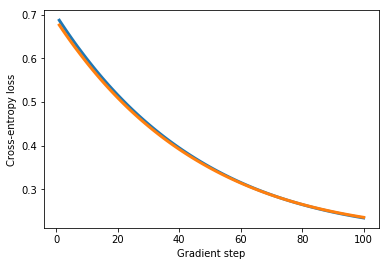

In [7]:
epochs = range(1, len(history.history["loss"])+1)
plt.plot(epochs, history.history["loss"], lw=3, label="Training loss")
plt.plot(epochs, history.history["val_loss"], lw=3, label="Validation loss")
plt.xlabel("Gradient step"), plt.ylabel("Cross-entropy loss");

## Inspect the learning function

As expected, the training performed by keras behaves very similar to the example implemented with plain TensorFlow.

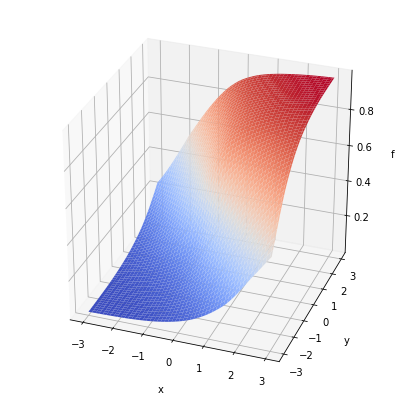

In [8]:
num_points = 100
grid = np.zeros((num_points**2, 2))
count = 0
for x_ in np.linspace(-3.0, 3.0, num_points):
    for y_ in np.linspace(-3.0, 3.0, num_points):
        grid[count, :] = (x_, y_)
        count += 1
        
f_ = model.predict(grid)

x = np.reshape(grid[:, 0], (num_points, num_points)).T
y = np.reshape(grid[:, 1], (num_points, num_points)).T
z = np.reshape(f_, (num_points, num_points)).T

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection="3d")
ax.view_init(30, -70)
ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_xlabel("x", labelpad=12)
ax.set_ylabel("y", labelpad=12)
ax.set_zlabel("f", labelpad=12);